# População IBGE

Estimativas do envelhecimento da população e taxas de crescimento populacional.

In [117]:
import tempfile
import requests

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### Envelhecimento da População até 2060

In [161]:
# dowload dos dados

PROJ_URL = 'https://ftp.ibge.gov.br/Projecao_da_Populacao/Projecao_da_Populacao_2018/projecoes_2018_populacao_2010_2060_20200406.xls'

def download_projecao(url):
    response = requests.get(url)

    temp_file = tempfile.NamedTemporaryFile(delete=False)
    temp_file.write(response.content)
    
    df = pd.read_excel(temp_file.name, sheet_name='BRASIL', skiprows=50, nrows=20)
    
    temp_file.close()
    
    return df

ibge = download_projecao(PROJ_URL)

ibge2060 = ibge.iloc[:, [0] + list(range(1, 60, 10))].drop(index=0)

ibge2060.head(10)


,GRUPO ETÁRIO,2010,2020,2030,2040,2050,2060
1,0-4,14858280,14730311,13629815,12413588,11620256,10774218
2,5-9,15865195,14650311,14304778,12951361,11966376,11223031
3,10-14,17397304,14805478,14690423,13599376,12389855,11600532
4,15-19,17219086,15790863,14596110,14260078,12916108,11937109
5,20-24,17476779,17233266,14688175,14594614,13521425,12325847
6,25-29,17334110,16985866,15607291,14455193,14139942,12817887
7,30-34,15955949,17205416,17007393,14523256,14455019,13404578
8,35-39,14075108,17026545,16738294,15410325,14298311,14001307
9,40-44,13184170,15602974,16893256,16739962,14320041,14273861
10,45-49,11992439,13652504,16602926,16375387,15107158,14041783


In [40]:
# pivotar a tabela para o formato desejado

table = ibge2060.melt(id_vars=['GRUPO ETÁRIO'], var_name='ANO', value_name='POP')

table

,GRUPO ETÁRIO,ANO,POP
0,0-4,2010,14858280
1,5-9,2010,15865195
2,10-14,2010,17397304
3,15-19,2010,17219086
4,20-24,2010,17476779
...,...,...,...
109,70-74,2060,13295484
110,75-79,2060,11511971
111,80-84,2060,8567809
112,85-89,2060,5434778


In [54]:
# redução do número de faixas etárias

conditions = [
    table['GRUPO ETÁRIO'].isin(['0-4', '5-9', '10-14', '15-19']),
    table['GRUPO ETÁRIO'].isin(['20-24', '25-29']),
    table['GRUPO ETÁRIO'].isin(['30-34', '35-39', '40-44', '45-49']),
    table['GRUPO ETÁRIO'].isin(['50-54', '55-59', '60-64']),
    table['GRUPO ETÁRIO'].isin(['65-69', '70-74', '75-79', '80-84', '85-89', '90+'])
    ]

values = ['0-19', '20-29', '30-49', '50-64', '65+']

table['FAIXAS'] = np.select(conditions, values)

grouped_table = table.groupby(['ANO', 'FAIXAS'])['POP'].sum().reset_index()
grouped_table['PERCENT'] = grouped_table.groupby('ANO')['POP'].apply(lambda x: x / x.sum()).reset_index()['POP']

grouped_table.head(10)

,ANO,FAIXAS,POP,PERCENT
0,2010,0-19,65339865,0.335264
1,2010,20-29,34810889,0.178618
2,2010,30-49,55207666,0.283275
3,2010,50-64,25261078,0.129617
4,2010,65+,14271184,0.073227
5,2020,0-19,59976963,0.283237
6,2020,20-29,34219132,0.161597
7,2020,30-49,63487439,0.299815
8,2020,50-64,33258809,0.157062
9,2020,65+,20813349,0.098289


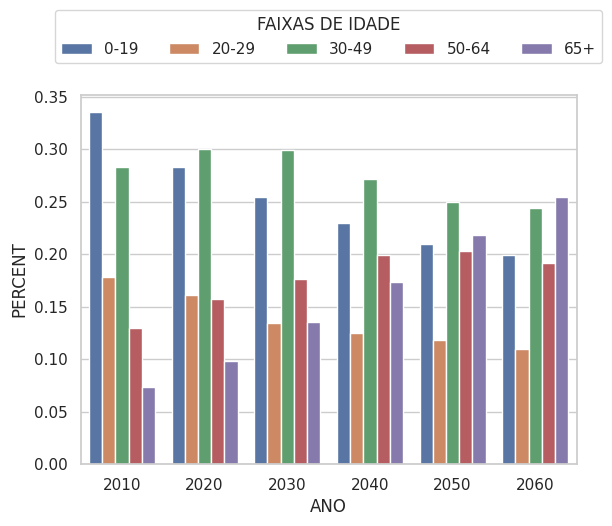

In [74]:
# visualização do envelhecimento da população brasileira

sns.barplot(data=grouped_table, x='ANO', y='PERCENT', hue='FAIXAS')
plt.xlabel('ANO')
plt.ylabel('PERCENT')
plt.legend(title='FAIXAS DE IDADE', loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=5)
plt.show();

### Taxa de Crescimento Populacional

In [160]:
# dowload dos dados de retroprojeção do ibge

RETRO_URL = 'https://ftp.ibge.gov.br/Retroprojecao_da_populacao/2010_2000/retroprojecao_2018_populacao_2000_2010.xls'

def download_retroprojecao(url):
    response = requests.get(url)

    temp_file = tempfile.NamedTemporaryFile(delete=False)
    temp_file.write(response.content)
    
    df = pd.read_excel(temp_file.name, sheet_name='BR GRUPOS ETÁRIOS', skiprows=50, nrows=20)
    
    temp_file.close()
    
    return df

ibge_retro = download_retroprojecao(RETRO_URL)

ibge_retro

,GRUPO ETÁRIO,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Total,173765726,176208646,178499255,180708344,182865043,184991143,187061610,189038268,191010274,192980905,194890682
1,0-4,17517709,17335042,16993784,16602745,16231822,15931753,15658361,15437065,15245451,15066823,14858280
2,5-9,17182449,17240180,17348563,17459652,17497180,17415719,17240690,16907184,16523379,16159147,15865195
3,10-14,17776905,17578821,17394779,17245834,17162489,17160789,17219186,17328134,17439772,17477937,17397304
4,15-19,18121097,18218034,18222851,18147637,18011967,17830254,17633656,17450923,17303033,17220430,17219086
5,20-24,16390553,16745801,17071445,17356597,17589050,17761732,17859262,17865035,17791051,17656832,17476779
6,25-29,14060066,14373850,14751527,15167728,15581365,15964476,16319190,16644355,16929151,17161412,17334110
7,30-34,13298849,13418073,13521623,13637267,13806773,14054342,14368647,14745984,15161251,15573807,15955949
8,35-39,12371574,12605420,12816987,13005160,13168096,13307333,13429638,13536354,13654936,13826543,14075108
9,40-44,10737347,11065175,11385038,11691428,11976722,12236441,12472137,12685850,12876421,13042038,13184170


In [112]:
# time series

ibge_retro_series = ibge_retro.iloc[0, 1:]
ibge_retro_series = pd.Series(ibge_retro_series)

ibge_retro_series


2000    173765726
2001    176208646
2002    178499255
2003    180708344
2004    182865043
2005    184991143
2006    187061610
2007    189038268
2008    191010274
2009    192980905
2010    194890682
Name: 0, dtype: object

In [133]:
# transformação dos dados de projeção em série temporal e concatenação com os dados de retroprojeção

ibge_proj_series = ibge.iloc[0, 1:]
ibge_proj_series = pd.Series(ibge_proj_series)

combined_ibge = pd.concat([ibge_retro_series, ibge_proj_series[range(2011, 2024)]], ignore_index=False)

combined_ibge

2000    173765726
2001    176208646
2002    178499255
2003    180708344
2004    182865043
2005    184991143
2006    187061610
2007    189038268
2008    191010274
2009    192980905
2010    194890682
2011    196603732
2012    198314934
2013    200004188
2014    201717541
2015    203475683
2016    205156587
2017    206804741
2018    208494900
2019    210147125
2020    211755692
2021    213317639
2022    214828540
2023    216284269
Name: 0, dtype: object

In [159]:
# cálculo da taxa anual de crescimento da população brasileira

X = combined_ibge.index.values.reshape(-1, 1)
y = combined_ibge.values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(X, y)

taxa_crescimento_percentual = (lm.coef_[0][0] / combined_ibge[2000]) * 100

print(lm.coef_[0][0])
print(round(taxa_crescimento_percentual, 2))

1827526.3569565217
1.05


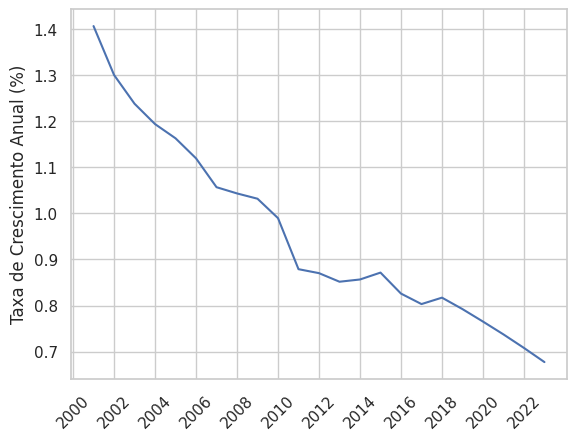

In [158]:

annual_growth_rate = combined_ibge.pct_change() * 100

plot = sns.lineplot(data=annual_growth_rate)
plot.set(xlabel='', ylabel='Taxa de Crescimento Anual (%)')
plt.xticks(ticks=range(2000, 2023, 2), rotation=45)
plt.show();



Nos últimos 20 anos, a taxa média de crescimento anual foi de 1,05%, cerca de 1.800.000 habitantes por ano. No entanto, observando o gráfico acima, podemos ver que esse crescimento populacional está desacelerando ano após anos, com projeções tendendo a um crescimento de apenas 0,5% a.a.